In [12]:
# 1) Load & EDA
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

df = pd.read_csv("creditcard.csv")

print(df.head())
print(df.info())
print(df.shape)
print(df.isnull().sum())
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

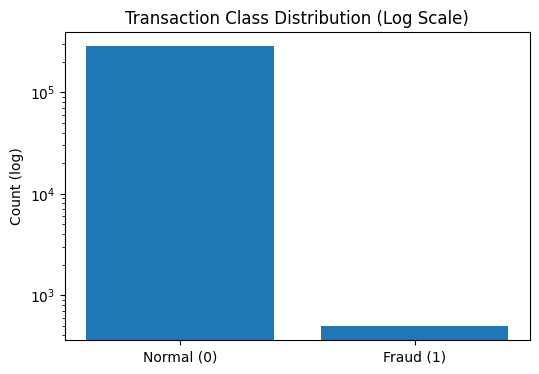

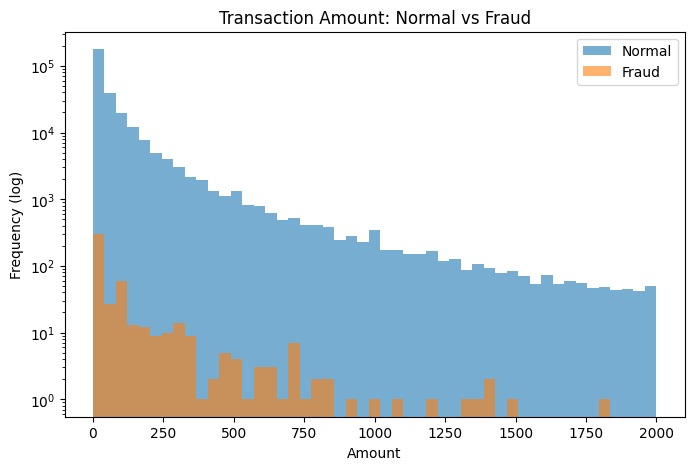

In [13]:
# Class distribution (log scale)
class_counts = df['Class'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(['Normal (0)', 'Fraud (1)'], class_counts.values)
plt.yscale('log')
plt.title('Transaction Class Distribution (Log Scale)')
plt.ylabel('Count (log)')
plt.show()

# Amount distribution
normal = df[df['Class']==0]['Amount']
fraud  = df[df['Class']==1]['Amount']
plt.figure(figsize=(8,5))
bins = np.linspace(0, 2000, 50)
plt.hist(normal, bins=bins, alpha=0.6, label='Normal')
plt.hist(fraud,  bins=bins, alpha=0.6, label='Fraud')
plt.yscale('log')
plt.legend()
plt.title('Transaction Amount: Normal vs Fraud')
plt.xlabel('Amount')
plt.ylabel('Frequency (log)')
plt.show()

In [14]:
# 2) Train / Test Split (ONCE)
# =========================
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [15]:
# 3) Logistic Regression (Baseline)
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression (Before SMOTE)")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=4))

Logistic Regression (Before SMOTE)
[[85279    16]
 [   57    91]]
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     85295
           1     0.8505    0.6149    0.7137       148

    accuracy                         0.9991     85443
   macro avg     0.9249    0.8073    0.8566     85443
weighted avg     0.9991    0.9991    0.9991     85443



In [16]:
# 4) Random Forest (Baseline)
# =========================
rf_before = RandomForestClassifier(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
rf_before.fit(X_train, y_train)
y_pred_rf = rf_before.predict(X_test)

print("Random Forest (Before SMOTE)")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))


Random Forest (Before SMOTE)
[[85291     4]
 [   36   112]]
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     85295
           1     0.9655    0.7568    0.8485       148

    accuracy                         0.9995     85443
   macro avg     0.9825    0.8784    0.9241     85443
weighted avg     0.9995    0.9995    0.9995     85443



In [17]:
# 5) SMOTE + Models
# =========================
# ---- Logistic Regression + SMOTE (scaled) ----
smote_lr = SMOTE(random_state=42)
X_train_lr_res, y_train_lr_res = smote_lr.fit_resample(X_train_scaled, y_train)

lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_train_lr_res, y_train_lr_res)
y_pred_lr_smote = lr_smote.predict(X_test_scaled)

print("Logistic Regression (After SMOTE)")
print(confusion_matrix(y_test, y_pred_lr_smote))
print(classification_report(y_test, y_pred_lr_smote, digits=4))

# ---- Random Forest + SMOTE (NO scaling) ----
smote_rf = SMOTE(random_state=42)
X_train_rf_res, y_train_rf_res = smote_rf.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_smote.fit(X_train_rf_res, y_train_rf_res)
y_pred_rf_smote = rf_smote.predict(X_test)

print("Random Forest (After SMOTE)")
print(confusion_matrix(y_test, y_pred_rf_smote))
print(classification_report(y_test, y_pred_rf_smote, digits=4))

Logistic Regression (After SMOTE)
[[83410  1885]
 [   18   130]]
              precision    recall  f1-score   support

           0     0.9998    0.9779    0.9887     85295
           1     0.0645    0.8784    0.1202       148

    accuracy                         0.9777     85443
   macro avg     0.5322    0.9281    0.5545     85443
weighted avg     0.9982    0.9777    0.9872     85443

Random Forest (After SMOTE)
[[85278    17]
 [   30   118]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8741    0.7973    0.8339       148

    accuracy                         0.9994     85443
   macro avg     0.9369    0.8985    0.9168     85443
weighted avg     0.9994    0.9994    0.9994     85443



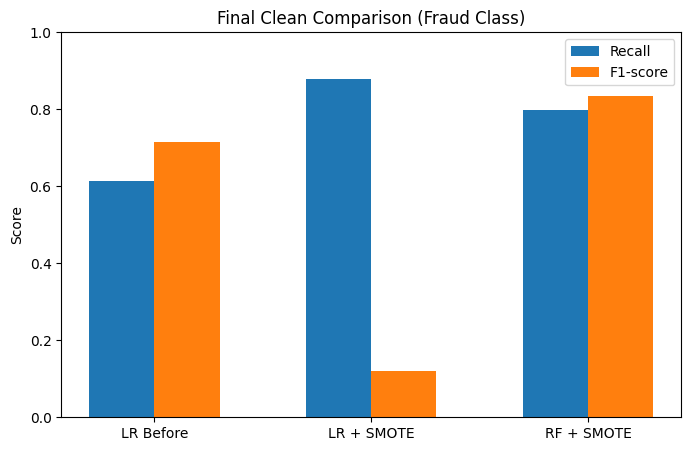

In [18]:
# 6) Final Clean Comparison Plot (3 Models)
# =========================
report_lr_before = classification_report(y_test, y_pred_lr, output_dict=True)
report_lr_after  = classification_report(y_test, y_pred_lr_smote, output_dict=True)
report_rf_after  = classification_report(y_test, y_pred_rf_smote, output_dict=True)

recall_fraud = [
    report_lr_before['1']['recall'],
    report_lr_after['1']['recall'],
    report_rf_after['1']['recall']
]

f1_fraud = [
    report_lr_before['1']['f1-score'],
    report_lr_after['1']['f1-score'],
    report_rf_after['1']['f1-score']
]

models = ['LR Before', 'LR + SMOTE', 'RF + SMOTE']

plt.figure(figsize=(8,5))
plt.bar([i-0.15 for i in range(3)], recall_fraud, width=0.3, label='Recall')
plt.bar([i+0.15 for i in range(3)], f1_fraud, width=0.3, label='F1-score')
plt.xticks(range(3), models)
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Final Clean Comparison (Fraud Class)')
plt.legend()
plt.show()